# Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

Loan status can have two values: Yes or NO.

Yes: if the loan is approved

NO: if the loan is not approved

So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

# Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

# Loading Train & Test Data

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Size of Train & Test Data

In [35]:
train.shape

(614, 13)

In [36]:
test.shape

(367, 12)

In [37]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


So we have 614 rows and 13 columns in our training dataset.

In test data, we have 367 rows and 12 columns because the target column is not included in the test data.

Categorical Columns: Gender (Male/Female), Married (Yes/No), Number of dependents (Possible values:0,1,2,3+), Education (Graduate / Not Graduate), Self-Employed (No/Yes), credit history(Yes/No), Property Area (Rural/Semi-Urban/Urban) and Loan Status (Y/N)(i. e. Target variable)

Numerical Columns: Loan ID, Applicant Income, Co-applicant Income, Loan Amount, and Loan amount term



# Data Preprocessing

In [38]:
# Concatenating the train and test data for data preprocessing
data = pd.concat([train,test])

In [39]:
# dropping the unwanted column 
data.drop('Loan_ID', axis=1, inplace=True)

In [40]:
# Identify missing values 
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [41]:
# Fill null values with mode
for i in [data]:
    i['Gender']=i['Gender'].fillna(data.Gender.dropna().mode()[0])
    i['Married']=i['Married'].fillna(data.Married.dropna().mode()[0])
    i['Dependents']=i['Dependents'].fillna(data.Dependents.dropna().mode()[0])
    i['Self_Employed']=i['Self_Employed'].fillna(data.Self_Employed.dropna().mode()[0])
    i['Credit_History']=i['Credit_History'].fillna(data.Credit_History.dropna().mode()[0])

In [42]:
# Next, we will be using Iterative imputer for filling missing values of LoanAmount and Loan_Amount_Term
from sklearn.ensemble import RandomForestRegressor
data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]

# Run Imputer with Random Forest Regressor
imp = IterativeImputer(RandomForestRegressor(), max_iter = 10, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


So now as we have imputed all the missing values we go on to mapping the categorical variables with the integers.
We map the values so that we can input the train data into the model as the model does not accept any string values.

In [43]:
for i in [data]:
    i['Gender'] = i['Gender'].map({'Male':0,'Female':1})
    i['Married'] = i['Married'].map({'No':0,'Yes':1})
    i['Education'] = i['Education'].map({'Not_Graduate':0,'Graduate':1})
    i['Self_Employed'] = i['Self_Employed'].map({'No':0,'Yes':1})
    i['Credit_History'] = i['Credit_History'].astype(int)

In [44]:
for i in [data]:
    i['Property_Area'] = i['Property_Area'].map({'Urban':0,'Rural':1,'Semi_Urban':2})
    i['Dependents'] = i['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [46]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education            218
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area        349
Loan_Status          367
dtype: int64

# Exploratory Data Analysis (EDA)

In [20]:
# Splitting the data to new_train and new_test so that we can perform EDA
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [21]:
# Mapping ‘N’ to 0 and ‘Y’ to 1
new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

/var/folders/kb/4d44tdp57j7f70rklzn_55ph0000gn/T/ipykernel_88326/765909046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


/Users/vinith/tensorflow-test/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Loan_Status'

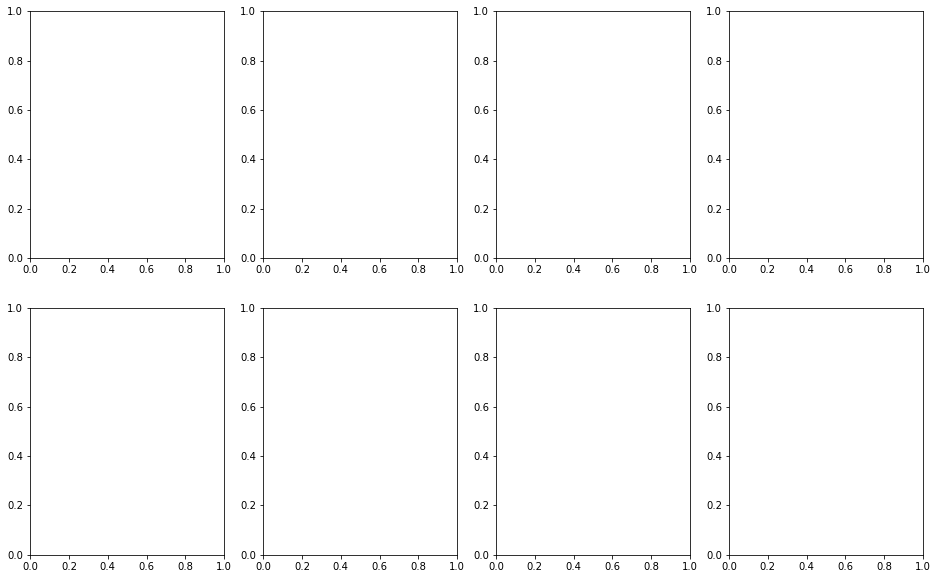

In [28]:
# Univariate Analysis
fig, ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status'   ,data=new_train, ax=ax[0][0])
sns.countplot('Gender'        ,data=new_train, ax=ax[0][1])
sns.countplot('Married'       ,data=new_train, ax=ax[0][2])
sns.countplot('Education'     ,data=new_train, ax=ax[0][3])
sns.countplot('Self_Employed' ,data=new_train, ax=ax[1][0])
sns.countplot('Property_Area' ,data=new_train, ax=ax[1][1])
sns.countplot('Credit_History',data=new_train, ax=ax[1][2])
sns.countplot('Dependents'    ,data=new_train, ax=ax[1][3])